In [4]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [5]:
caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w",]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]

In [6]:
def prepare_hh_dict(mem):
    hh_dict = {}
    if mem == "16KB":
        hh_dict["caida0517-500w"] = (31.5, 16.41, 192.12, "cs")
        hh_dict["caida0517-250w"] = (17.26, 10.83, 181.92, "cs")
        hh_dict["caida0517-150w"] = (12.97, 10.25, 177.01, "cs")
        hh_dict["caida0517-070w"] = (7.04, 7.16, 101.93, "cm")
        hh_dict["caida0517-030w"] = (4.02, 3.80, 68.62, "cs")
        hh_dict["zipf2a-150w"] = (6.54, 8.84, 168.38, "cm")
        hh_dict["zipf2a-070w"] = (4.07, 4.97, 139.53, "cm")
        hh_dict["zipf2a-030w"] = (3.70, 4.35, 96.37, "cm")
        hh_dict["zipf10-070w"] = (5.49, 9.15, 74.44, "cm")
        hh_dict["zipf10-030w"] = (1.83, 6.43, 62.33, "cm")
    elif mem == "32KB":
        hh_dict["caida0517-500w"] = (11.49, 7.31, 100.92, "cs")
        hh_dict["caida0517-250w"] = (5.92, 4.44, 75.71, "cs")
        hh_dict["caida0517-150w"] = (5.40, 5.54, 61.42, "cm")
        hh_dict["caida0517-070w"] = (2.22, 4.12, 34.03, "cm")
        hh_dict["caida0517-030w"] = (1.28, 1.86, 25.52, "cm")
        hh_dict["zipf2a-150w"] = (2.37, 1.96, 93.53, "cs")
        hh_dict["zipf2a-070w"] = (1.47, 1.451, 91.07, "cs")
        hh_dict["zipf2a-030w"] = (1.23, 1.02, 45.23, "cs")
        hh_dict["zipf10-070w"] = (1.34, 3.32, 41.41, "cm")
        hh_dict["zipf10-030w"] = (0.23, 2.43, 25.23, "cm")
    elif mem == "64KB":
        hh_dict["caida0517-500w"] = (3.76, 3.43, 54.25, "cs")
        hh_dict["caida0517-250w"] = (2.11, 1.70, 26.64, "cs")
        hh_dict["caida0517-150w"] = (1.58, 1.70, 26.99, "cm")
        hh_dict["caida0517-070w"] = (0.61, 1.87, 12.71, "cm")
        hh_dict["caida0517-030w"] = (0.26, 0.83, 12.42, "cm")
        hh_dict["zipf2a-150w"] = (0.88, 0.90, 64.11, "cm")
        hh_dict["zipf2a-070w"] = (0.52, 0.51, 51.03, "cs")
        hh_dict["zipf2a-030w"] = (0.43, 0.33, 27.70, "cs")
        hh_dict["zipf10-070w"] = (0.42, 1.61, 19.48, "cm")
        hh_dict["zipf10-030w"] = (0.01, 0.10, 8.07, "cm")
    elif mem == "128KB":
        hh_dict["caida0517-500w"] = (1.16, 1.35, 18.70, "cm")
        hh_dict["caida0517-250w"] = (0.84, 1.14, 6.71, "cm")
        hh_dict["caida0517-150w"] = (0.60, 0.97, 8.85, "cm")
        hh_dict["caida0517-070w"] = (0.15, 0.50, 4.98, "cm")
        hh_dict["caida0517-030w"] = (0.04, 0.21, 2.86, "cm")
        hh_dict["zipf2a-150w"] = (0.36, 0.35, 31.17, "cs")
        hh_dict["zipf2a-070w"] = (0.21, 0.43, 16.58, "cm")
        hh_dict["zipf2a-030w"] = (0.13, 0.17, 12.94, "cm")
        hh_dict["zipf10-070w"] = (0.01, 0.72, 1.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.01, 2.84, "cm")
    elif mem == "256KB":
        hh_dict["caida0517-500w"] = (0.44, 0.75, 7.14, "cm")
        hh_dict["caida0517-250w"] = (0.21, 0.58, 2.74, "cm")
        hh_dict["caida0517-150w"] = (0.09, 0.36, 3.34, "cm")
        hh_dict["caida0517-070w"] = (0.04, 0.20, 2.72, "cm")
        hh_dict["caida0517-030w"] = (0.01, 0.06, 0.66, "cm")
        hh_dict["zipf2a-150w"] = (0.14, 0.11, 12.04, "cs")
        hh_dict["zipf2a-070w"] = (0.07, 0.08, 3.83, "cm")
        hh_dict["zipf2a-030w"] = (0.05, 0.07, 1.11, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.09, 0.82, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 1.02, "cm")
    elif mem == "512KB":
        hh_dict["caida0517-500w"] = (0.12, 0.20, 3.62, "cm")
        hh_dict["caida0517-250w"] = (0.04, 0.12, 0.84, "cm")
        hh_dict["caida0517-150w"] = (0.36, 0.16, 0.84, "cs")
        hh_dict["caida0517-070w"] = (0.01, 0.03, 0.40, "cm")
        hh_dict["caida0517-030w"] = (0.0, 0.01, 0.08, "cm")
        hh_dict["zipf2a-150w"] = (0.04, 0.05, 1.50, "cm")
        hh_dict["zipf2a-070w"] = (0.02, 0.04, 2.64, "cm")
        hh_dict["zipf2a-030w"] = (0.01, 0.02, 0.36, "cm")
        hh_dict["zipf10-070w"] = (0.0, 0.01, 0.52, "cm")
        hh_dict["zipf10-030w"] = (0.0, 0.0, 0.32, "cm")
        
    return hh_dict

In [7]:
def prepare_fsd_dict(mem):
    fsd_dict = {}
    if mem == "16KB":
        fsd_dict["caida0517-500w"] = (1.82, 1.54, "cs")
        fsd_dict["caida0517-250w"] = (1.54, 1.36, "cs")
        fsd_dict["caida0517-150w"] = (1.41, 1.24, "cs")
        fsd_dict["caida0517-070w"] = (1.06, 0.96, "cs")
        fsd_dict["caida0517-030w"] = (0.96, 0.87, "cs")
        fsd_dict["zipf2a-150w"] = (1.33, 1.10, "cs")
        fsd_dict["zipf2a-070w"] = (1.17, 0.97, "cs")
        fsd_dict["zipf2a-030w"] = (1.22, 0.82, "cs")
        fsd_dict["zipf10-070w"] = (0.82, 0.90, "cm")
        fsd_dict["zipf10-030w"] = (0.40, 0.55, "cm")
    elif mem == "32KB":
        fsd_dict["caida0517-500w"] = (1.61, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.35, 1.18, "cs")
        fsd_dict["caida0517-150w"] = (1.09, 1.07, "cs")
        fsd_dict["caida0517-070w"] = (0.91, 0.87, "cs")
        fsd_dict["caida0517-030w"] = (0.69, 0.66, "cs")
        fsd_dict["zipf2a-150w"] = (1.44, 1.02, "cs")
        fsd_dict["zipf2a-070w"] = (1.07, 0.82, "cs")
        fsd_dict["zipf2a-030w"] = (0.94, 0.69, "cs")
        fsd_dict["zipf10-070w"] = (0.43, 0.61, "cm")
        fsd_dict["zipf10-030w"] = (0.14, 0.31, "cm")
    elif mem == "64KB":
        fsd_dict["caida0517-500w"] = (1.35, 1.31, "cs")
        fsd_dict["caida0517-250w"] = (1.14, 1.13, "cs")
        fsd_dict["caida0517-150w"] = (1.01, 0.96, "cs")
        fsd_dict["caida0517-070w"] = (0.81, 0.71, "cs")
        fsd_dict["caida0517-030w"] = (0.45, 0.51, "cm")
        fsd_dict["zipf2a-150w"] = (1.03, 0.98, "cs")
        fsd_dict["zipf2a-070w"] = (0.86, 0.74, "cs")
        fsd_dict["zipf2a-030w"] = (0.71, 0.56, "cs")
        fsd_dict["zipf10-070w"] = (0.16, 0.38, "cm")
        fsd_dict["zipf10-030w"] = (0.03, 0.15, "cm")
    elif mem == "128KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.24, "cm")
        fsd_dict["caida0517-250w"] = (1.07, 1.05, "cs")
        fsd_dict["caida0517-150w"] = (0.89, 0.89, "cm")
        fsd_dict["caida0517-070w"] = (0.55, 0.66, "cm")
        fsd_dict["caida0517-030w"] = (0.24, 0.35, "cm")
        fsd_dict["zipf2a-150w"] = (0.94, 0.89, "cs")
        fsd_dict["zipf2a-070w"] = (0.79, 0.68, "cs")
        fsd_dict["zipf2a-030w"] = (0.49, 0.45, "cs")
        fsd_dict["zipf10-070w"] = (0.03, 0.15, "cm")
        fsd_dict["zipf10-030w"] = (0.01, 0.04, "cm")
    elif mem == "256KB":
        fsd_dict["caida0517-500w"] = (1.24, 1.16, "cs")
        fsd_dict["caida0517-250w"] = (1.00, 0.95, "cs")
        fsd_dict["caida0517-150w"] = (0.70, 0.78, "cm")
        fsd_dict["caida0517-070w"] = (0.26, 0.42, "cm")
        fsd_dict["caida0517-030w"] = (0.07, 0.17, "cm")
        fsd_dict["zipf2a-150w"] = (0.93, 0.83, "cs")
        fsd_dict["zipf2a-070w"] = (0.58, 0.58, "cs")
        fsd_dict["zipf2a-030w"] = (0.23, 0.35, "cm")
        fsd_dict["zipf10-070w"] = (0.01, 0.05, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")
    elif mem == "512KB":
        fsd_dict["caida0517-500w"] = (1.07, 1.12, "cm")
        fsd_dict["caida0517-250w"] = (0.57, 0.76, "cm")
        fsd_dict["caida0517-150w"] = (0.36, 0.55, "cm")
        fsd_dict["caida0517-070w"] = (0.08, 0.23, "cm")
        fsd_dict["caida0517-030w"] = (0.02, 0.09, "cm")
        fsd_dict["zipf2a-150w"] = (0.68, 0.72, "cm")
        fsd_dict["zipf2a-070w"] = (0.29, 0.42, "cm")
        fsd_dict["zipf2a-030w"] = (0.09, 0.18, "cm")
        fsd_dict["zipf10-070w"] = (0.0, 0.01, "cm")
        fsd_dict["zipf10-030w"] = (0.0, 0.01, "cm")    
    
    return fsd_dict


In [8]:
def prepare_ent_dict(mem):
    ent_dict = {}
    if mem == "16KB":
        ent_dict["caida0517-500w"] = (23.56, 60.63, 233.84, "cm")
        ent_dict["caida0517-250w"] = (19.44, 51.58, 188.73, "cm")
        ent_dict["caida0517-150w"] = (16.82, 45.68, 189.01, "cm")
        ent_dict["caida0517-070w"] = (12.12, 35.31, 150.34, "cm")
        ent_dict["caida0517-030w"] = (8.91, 26.3, 111.77, "cm")
        ent_dict["zipf2a-150w"] = (15.68, 39.86, 278.91, "cm")
        ent_dict["zipf2a-070w"] = (12.29, 31.78, 193.12, "cm")
        ent_dict["zipf2a-030w"] = (10.08, 26.88, 166.64, "cm")
        ent_dict["zipf10-070w"] = (7.44, 24.09, 103.00, "cm")
        ent_dict["zipf10-030w"] = (4.47, 14.57, 50.20, "cm")
    elif mem == "32KB":
        ent_dict["caida0517-500w"] = (17.61, 50.30, 118.04, "cm")
        ent_dict["caida0517-250w"] = (13.93, 40.35, 101.52, "cm")
        ent_dict["caida0517-150w"] = (11.81, 35.72, 83.55, "cm")
        ent_dict["caida0517-070w"] = (7.74, 24.58, 69.20, "cm")
        ent_dict["caida0517-030w"] = (5.28, 16.82, 46.20, "cm")
        ent_dict["zipf2a-150w"] = (11.15, 31.64, 134.47, "cm")
        ent_dict["zipf2a-070w"] = (8.55, 25.25, 107.78, "cm")
        ent_dict["zipf2a-030w"] = (6.71, 21.09, 75.39, "cm")
        ent_dict["zipf10-070w"] = (4.24, 14.69, 48.55, "cm")
        ent_dict["zipf10-030w"] = (2.39, 8.06, 16.96, "cm")
    elif mem == "64KB":
        ent_dict["caida0517-500w"] = (12.64, 39.29, 52.38, "cm")
        ent_dict["caida0517-250w"] = (9.45, 30.20, 46.12, "cm")
        ent_dict["caida0517-150w"] = (7.67, 25.63, 36.71, "cm")
        ent_dict["caida0517-070w"] = (4.80, 16.94, 26.65, "cm")
        ent_dict["caida0517-030w"] = (2.91, 9.51, 13.70, "cm")
        ent_dict["zipf2a-150w"] = (7.86, 24.30, 69.31, "cm")
        ent_dict["zipf2a-070w"] = (5.80, 18.83, 53.18, "cm")
        ent_dict["zipf2a-030w"] = (4.31, 12.25, 35.69, "cm")
        ent_dict["zipf10-070w"] = (2.42, 8.31, 22.11, "cm")
        ent_dict["zipf10-030w"] = (1.27, 4.58, 8.50, "cm")
    elif mem == "128KB":
        ent_dict["caida0517-500w"] = (8.55, 29.86, 20.32, "cm")
        ent_dict["caida0517-250w"] = (6.12, 21.92, 14.85, "cm")
        ent_dict["caida0517-150w"] = (4.79, 17.49, 10.28, "cm")
        ent_dict["caida0517-070w"] = (2.75, 10.05, 9.27, "cm")
        ent_dict["caida0517-030w"] = (1.55, 5.47, 0.68, "univmon")
        ent_dict["zipf2a-150w"] = (5.31, 18.85, 32.06, "cm")
        ent_dict["zipf2a-070w"] = (3.80, 14.30, 18.54, "cm")
        ent_dict["zipf2a-030w"] = (2.56, 10.77, 11.13, "cm")
        ent_dict["zipf10-070w"] = (1.06, 3.57, 11.90, "cm")
        ent_dict["zipf10-030w"] = (0.51, 1.75, 1.26, "cm")
    elif mem == "256KB":
        ent_dict["caida0517-500w"] = (5.46, 21.10, 2.28, "univmon")
        ent_dict["caida0517-250w"] = (3.18, 14.52, 2.68, "univmon")
        ent_dict["caida0517-150w"] = (2.75, 10.77, 0.43, "univmon")
        ent_dict["caida0517-070w"] = (1.49, 5.91, 0.85, "univmon")
        ent_dict["caida0517-030w"] = (0.77, 2.90, 5.86, "cm")
        ent_dict["zipf2a-150w"] = (3.44, 14.26, 10.46, "cm")
        ent_dict["zipf2a-070w"] = (2.30, 10.01, 1.30, "univmon")
        ent_dict["zipf2a-030w"] = (1.47, 6.85, 1.36, "univmon")
        ent_dict["zipf10-070w"] = (1.03, 2.09, 9.29, "cm")
        ent_dict["zipf10-030w"] = (0.27, 0.71, 0.22, "univmon")
    elif mem == "512KB":
        ent_dict["caida0517-500w"] = (3.24, 13.81, 3.97, "cm")
        ent_dict["caida0517-250w"] = (2.08, 8.85, 7.92, "cm")
        ent_dict["caida0517-150w"] = (1.46, 6.20, 6.60, "cm")
        ent_dict["caida0517-070w"] = (0.73, 2.95, 2.45, "cm")
        ent_dict["caida0517-030w"] = (0.41, 1.59, 6.74, "cm")
        ent_dict["zipf2a-150w"] = (2.08, 9.64, 0.47, "univmon")
        ent_dict["zipf2a-070w"] = (1.27, 6.17, 3.51, "cm")
        ent_dict["zipf2a-030w"] = (0.81, 3.96, 4.36, "cm")
        ent_dict["zipf10-070w"] = (0.37, 1.03, 7.77, "cm")
        ent_dict["zipf10-030w"] = (0.17, 0.48, 0.25, "cm")


    return ent_dict


### Configuration Selection

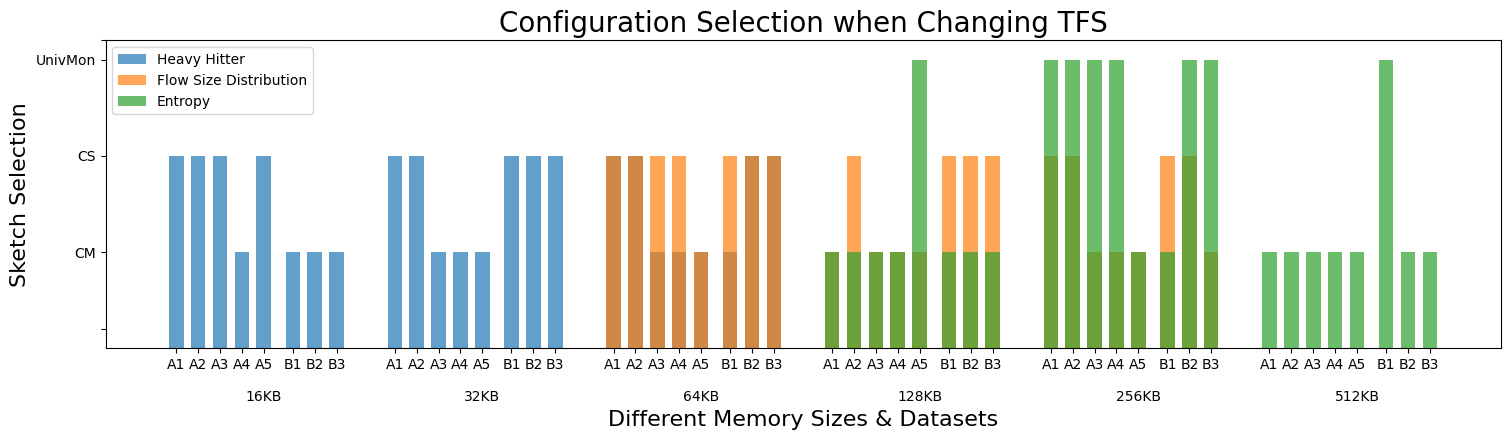

In [6]:
def plot_config_selection_fixed_fsd():
    x_ticks = ['16KB', '32KB', '64KB', '128KB', '256KB', '512KB']
    
    # datasets = caida0517 + zipf2a + zipf10
    datasets = caida0517 + zipf2a
    none_bar = ["None" for i in range(len(datasets))]
    ## hh '16KB' ~ '64KB'
    hh_dict = {}
    for key in x_ticks[0:3]:
        hh_dict[key] = []
        hh_res = prepare_hh_dict(key)
        for d in datasets:
            hh_dict[key].append(hh_res[d][-1])
            
    ## fsd '64KB' ~ '256KB'
    fsd_dict = {}
    for key in x_ticks[2:5]:
        fsd_dict[key] = []
        fsd_res = prepare_fsd_dict(key)
        for d in datasets:
            fsd_dict[key].append(fsd_res[d][-1])
            
    ## ent '128KB' ~ '512KB'
    ent_dict = {}
    for key in x_ticks[3:]:
        ent_dict[key] = []
        ent_res = prepare_ent_dict(key)
        for d in datasets:
            ent_dict[key].append(ent_res[d][-1])
            
    for key in x_ticks:
        if key not in hh_dict.keys():
            hh_dict[key] = none_bar
        if key not in fsd_dict.keys():
            fsd_dict[key] = none_bar
        if key not in ent_dict.keys():
            ent_dict[key] = none_bar
            
    hh_data = {key: hh_dict[key] for key in x_ticks}
    fsd_data = {key: fsd_dict[key] for key in x_ticks}
    ent_data = {key: ent_dict[key] for key in x_ticks}
            
    ## plot
    bar_heights = {'None': 0, 'cm': 1, 'cs': 2, 'univmon': 3}
    offset = [-12/30, -9/30, -6/30, -3/30, 0/30, 4/30, 7/30, 10/30]
    
    bar_width = 2/30
    bar_spacing = 1/30
    x = np.arange(len(x_ticks))
    
    # Additional ticks
    additional_ticks = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3']
    all_ticks = []
    for i in range(len(x_ticks)):
        for j, val in enumerate(additional_ticks):
            if j == 4:
                all_ticks.append(f'{val}\n\n{x_ticks[i]}')
                # all_ticks.append(val)
            else:
                all_ticks.append(val)
    all_pos = []
    for p in x:
        for j in offset:
            all_pos.append(p+j)
    
    
    plt.figure(figsize=(18, 4))
    plot = 0
    for i, (key, value) in enumerate(hh_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:blue', alpha=0.7, label=f'Heavy Hitter' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='o', color='tab:blue', label=f'Heavy Hitter' if plot == 0 else None)
            #     plot = 1
    
    plot = 0
    for i, (key, value) in enumerate(fsd_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:orange', alpha=0.7, label=f'Flow Size Distribution' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='x', color='tab:orange', label=f'Flow Size Distribution' if plot == 0 else None)
            #     plot = 1
            
    plot = 0
    for i, (key, value) in enumerate(ent_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:green', alpha=0.7, label=f'Entropy' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='s', color='tab:green', label=f'Entropy' if plot == 0 else None)
            #     plot = 1

    # plt.xticks(x, all_ticks)
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=16)
    plt.ylabel("Sketch Selection", fontsize=16)

    plt.legend()

    plt.show()
    
plot_config_selection_fixed_fsd()


24 24


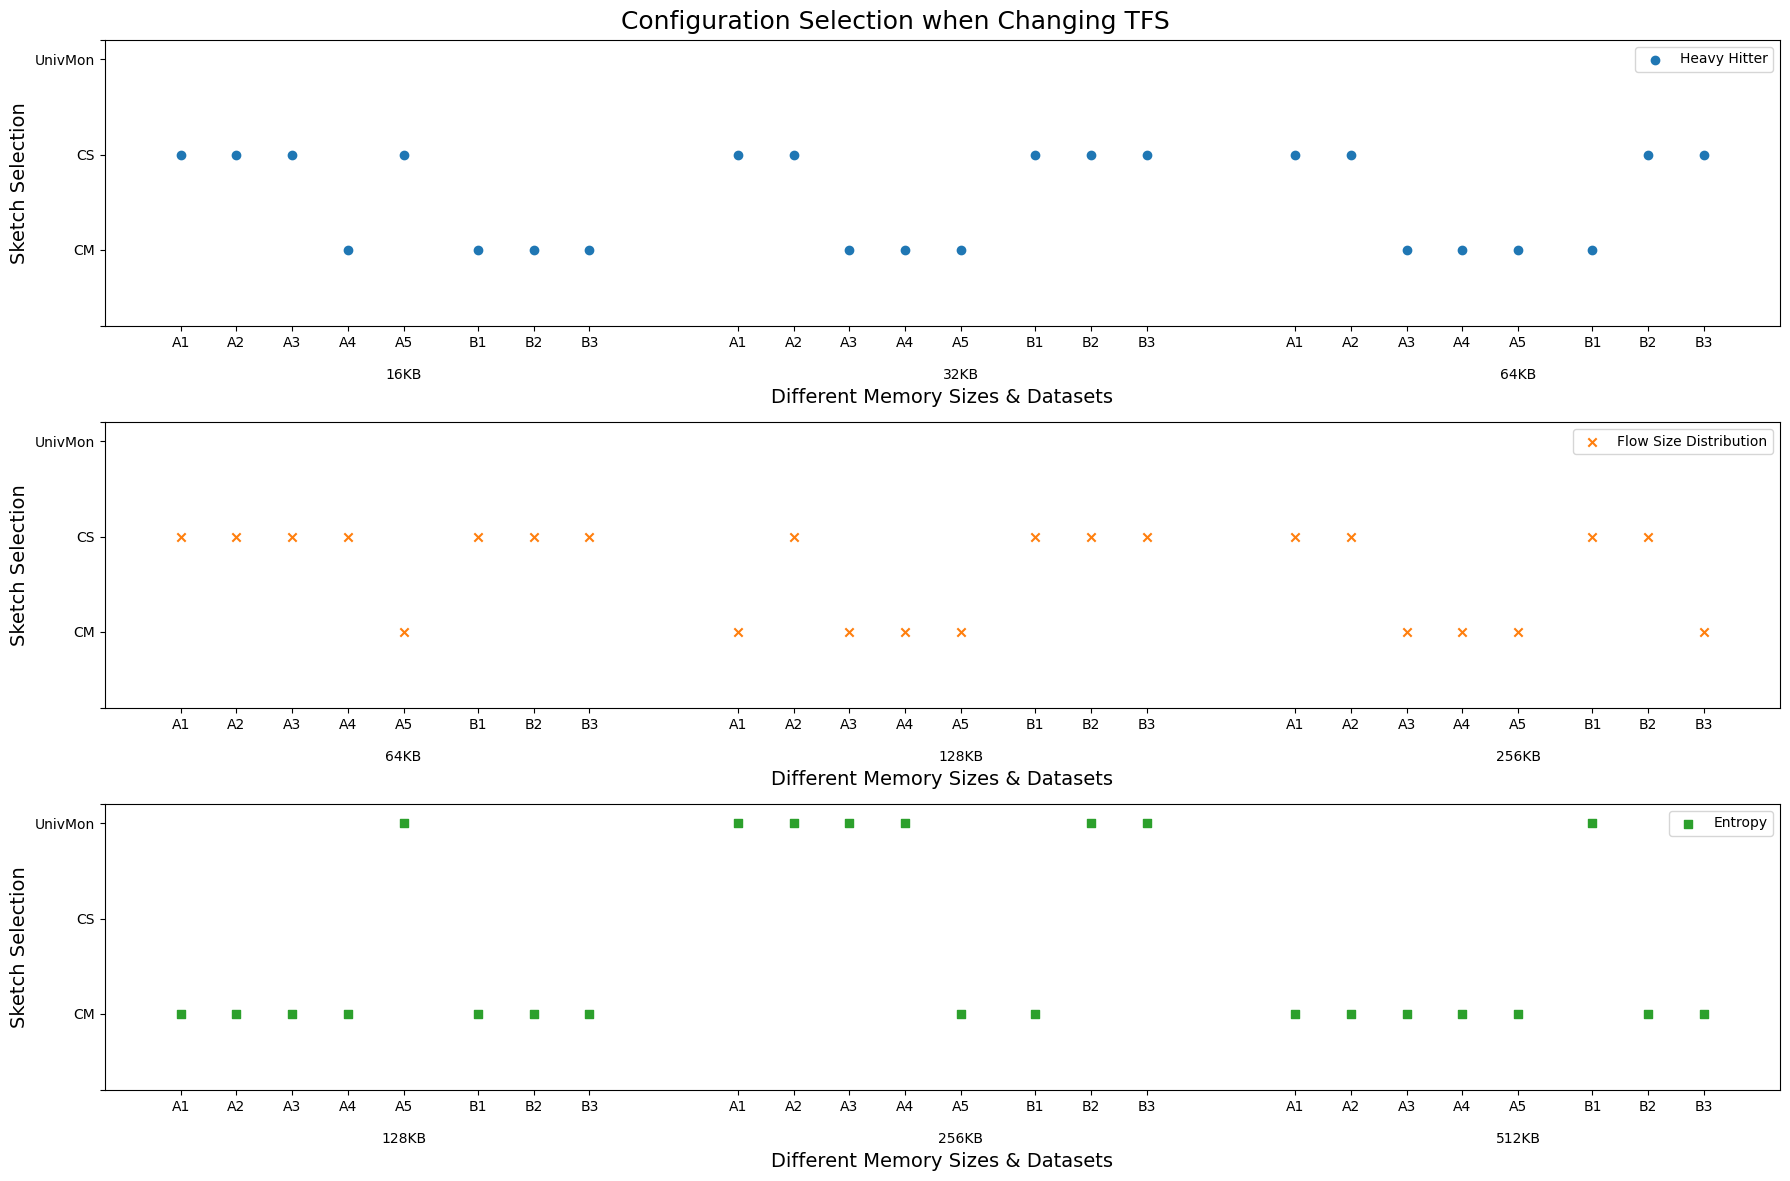

In [7]:
def plot_config_selection_fixed_fsd_single_metric():
    x_ticks = ['16KB', '32KB', '64KB', '128KB', '256KB', '512KB']
    
    # datasets = caida0517 + zipf2a + zipf10
    datasets = caida0517 + zipf2a
    none_bar = ["None" for i in range(len(datasets))]
    ## hh '16KB' ~ '64KB'
    hh_dict = {}
    for key in x_ticks[0:3]:
        hh_dict[key] = []
        hh_res = prepare_hh_dict(key)
        for d in datasets:
            hh_dict[key].append(hh_res[d][-1])
            
    ## fsd '64KB' ~ '256KB'
    fsd_dict = {}
    for key in x_ticks[2:5]:
        fsd_dict[key] = []
        fsd_res = prepare_fsd_dict(key)
        for d in datasets:
            fsd_dict[key].append(fsd_res[d][-1])
            
    ## ent '128KB' ~ '512KB'
    ent_dict = {}
    for key in x_ticks[3:]:
        ent_dict[key] = []
        ent_res = prepare_ent_dict(key)
        for d in datasets:
            ent_dict[key].append(ent_res[d][-1])
            
    # for key in x_ticks:
    #     if key not in hh_dict.keys():
    #         hh_dict[key] = none_bar
    #     if key not in fsd_dict.keys():
    #         fsd_dict[key] = none_bar
    #     if key not in ent_dict.keys():
    #         ent_dict[key] = none_bar
            
    # hh_data = {key: hh_dict[key] for key in x_ticks}
    # fsd_data = {key: fsd_dict[key] for key in x_ticks}
    # ent_data = {key: ent_dict[key] for key in x_ticks}
            
    ## plot
    bar_heights = {'None': 0, 'cm': 1, 'cs': 2, 'univmon': 3}
    offset = [-12/30, -9/30, -6/30, -3/30, 0/30, 4/30, 7/30, 10/30]
    
    bar_width = 2/30
    bar_spacing = 1/30
    x = np.arange(3)
    
    # Additional ticks
    additional_ticks = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3']
    all_pos = []
    for p in x:
        for j in offset:
            all_pos.append(p+j)
    
    
    plt.figure(figsize=(18, 12))
    plt.subplot(3,1,1)
    
    all_ticks = []
    for mem in x_ticks[0:3]:
        for j, val in enumerate(additional_ticks):
            if j == 4:
                all_ticks.append(f'{val}\n\n{mem}')
                # all_ticks.append(val)
            else:
                all_ticks.append(val)
    print(len(all_pos), len(all_ticks))
    plot = 0
    for i, (key, value) in enumerate(hh_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:blue', alpha=0.7, label=f'Heavy Hitter' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='o', color='tab:blue', label=f'Heavy Hitter' if plot == 0 else None)
                plot = 1
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)
    
    plt.subplot(3,1,2)
    all_ticks = []
    for mem in x_ticks[2:5]:
        for j, val in enumerate(additional_ticks):
            if j == 4:
                all_ticks.append(f'{val}\n\n{mem}')
                # all_ticks.append(val)
            else:
                all_ticks.append(val)
    plot = 0
    for i, (key, value) in enumerate(fsd_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:orange', alpha=0.7, label=f'Flow Size Distribution' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='x', color='tab:orange', label=f'Flow Size Distribution' if plot == 0 else None)
                plot = 1
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)
            
    
    plt.subplot(3,1,3)
    all_ticks = []
    for mem in x_ticks[3:]:
        for j, val in enumerate(additional_ticks):
            if j == 4:
                all_ticks.append(f'{val}\n\n{mem}')
                # all_ticks.append(val)
            else:
                all_ticks.append(val)
    plot = 0
    for i, (key, value) in enumerate(ent_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:green', alpha=0.7, label=f'Entropy' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='s', color='tab:green', label=f'Entropy' if plot == 0 else None)
                plot = 1

    # plt.xticks(x, all_ticks)
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)

    
    plt.suptitle("Configuration Selection when Changing TFS", fontsize=18)
    plt.tight_layout()

    plt.show()
    
plot_config_selection_fixed_fsd_single_metric()


---

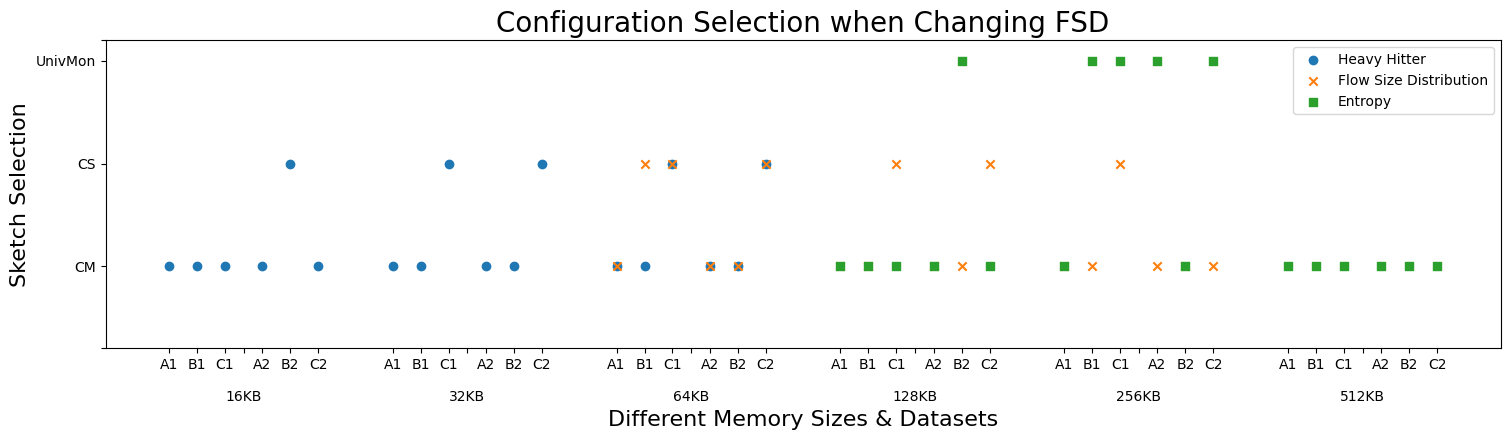

In [8]:
def plot_config_selection_fixed_tfs():
    x_ticks = ['16KB', '32KB', '64KB', '128KB', '256KB', '512KB']
    
    # datasets = caida0517 + zipf2a + zipf10
    datasets = [zipf10[0], caida0517[3], zipf2a[1], zipf10[1], caida0517[4], zipf2a[2]]
    none_bar = ["None" for i in range(len(datasets))]
    ## hh '16KB' ~ '64KB'
    hh_dict = {}
    for key in x_ticks[0:3]:
        hh_dict[key] = []
        hh_res = prepare_hh_dict(key)
        for d in datasets:
            hh_dict[key].append(hh_res[d][-1])
            
    ## fsd '64KB' ~ '256KB'
    fsd_dict = {}
    for key in x_ticks[2:5]:
        fsd_dict[key] = []
        fsd_res = prepare_fsd_dict(key)
        for d in datasets:
            fsd_dict[key].append(fsd_res[d][-1])
            
    ## ent '128KB' ~ '512KB'
    ent_dict = {}
    for key in x_ticks[3:]:
        ent_dict[key] = []
        ent_res = prepare_ent_dict(key)
        for d in datasets:
            ent_dict[key].append(ent_res[d][-1])
            
    for key in x_ticks:
        if key not in hh_dict.keys():
            hh_dict[key] = none_bar
        if key not in fsd_dict.keys():
            fsd_dict[key] = none_bar
        if key not in ent_dict.keys():
            ent_dict[key] = none_bar
            
    hh_data = {key: hh_dict[key] for key in x_ticks}
    fsd_data = {key: fsd_dict[key] for key in x_ticks}
    ent_data = {key: ent_dict[key] for key in x_ticks}
            
    ## plot
    bar_heights = {'None': 0, 'cm': 1, 'cs': 2, 'univmon': 3}
    # offset = [-9/24, -6/24, -3/24, 1/24, 4/24, 7/24]
    offset = [-9/24, -6/24, -3/24, 1/24, 4/24, 7/24]
    
    bar_width = 2/24
    bar_spacing = 1/24
    x = np.arange(len(x_ticks))
    
    # Additional ticks
    additional_ticks = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2']
    all_ticks = []
    for i in range(len(x_ticks)):
        for j, val in enumerate(additional_ticks):
            if j == 3:
                all_ticks.append(f'\n\n{x_ticks[i]}')
                all_ticks.append(val)
            else:
                all_ticks.append(val)
    all_pos = []
    for p in x:
        for j in [-9/24, -6/24, -3/24, -1/24, 1/24, 4/24, 7/24]:
            all_pos.append(p+j)
    
    
    plt.figure(figsize=(18, 4))
    plot = 0
    for i, (key, value) in enumerate(hh_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:blue', alpha=0.7, label=f'Heavy Hitter' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='o', color='tab:blue', label=f'Heavy Hitter' if plot == 0 else None)
                plot = 1
    
    plot = 0
    for i, (key, value) in enumerate(fsd_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:orange', alpha=0.7, label=f'Flow Size Distribution' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='x', color='tab:orange', label=f'Flow Size Distribution' if plot == 0 else None)
                plot = 1
            
    plot = 0
    for i, (key, value) in enumerate(ent_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:green', alpha=0.7, label=f'Entropy' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='s', color='tab:green', label=f'Entropy' if plot == 0 else None)
                plot = 1

    # plt.xticks(x, all_ticks)
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    plt.title("Configuration Selection when Changing FSD", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=16)
    plt.ylabel("Sketch Selection", fontsize=16)

    plt.legend()

    plt.show()
    
plot_config_selection_fixed_tfs()


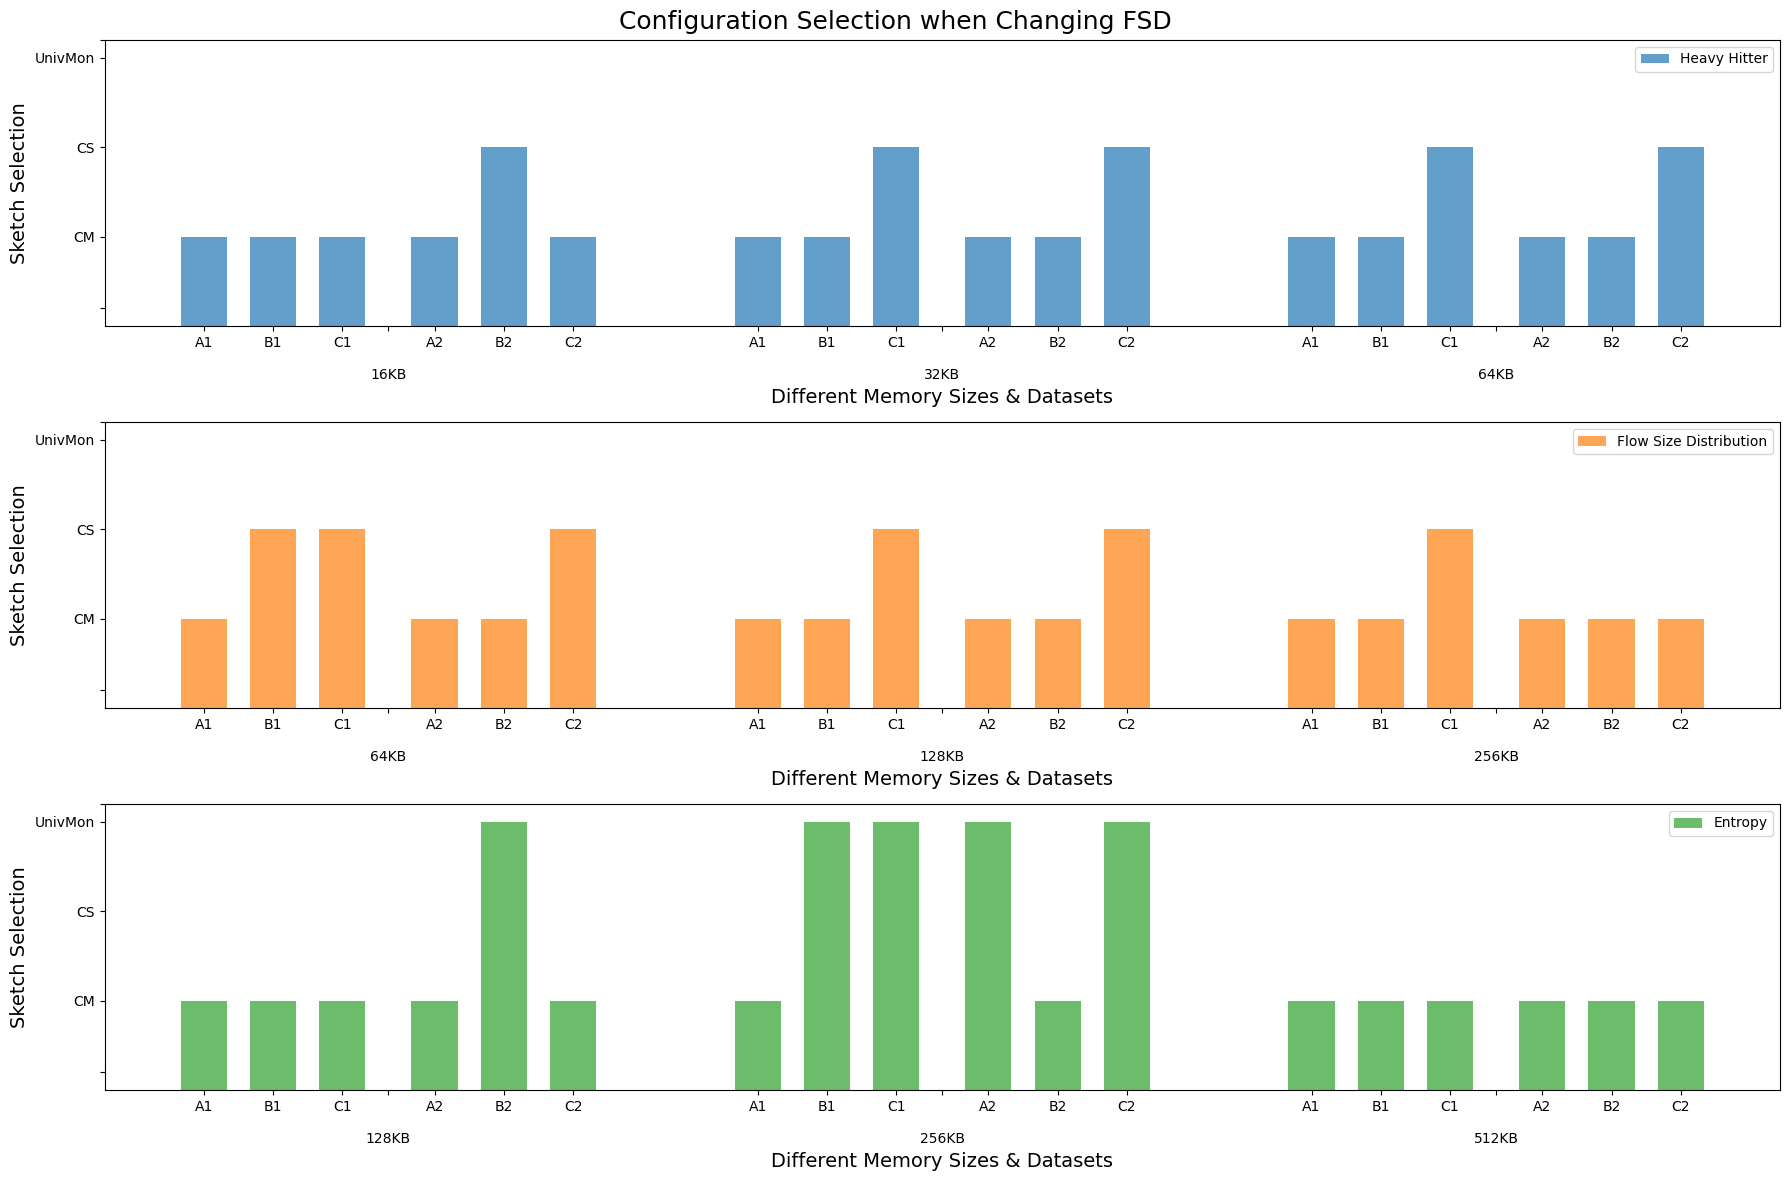

In [9]:
def plot_config_selection_fixed_tfs_single_metric():
    x_ticks = ['16KB', '32KB', '64KB', '128KB', '256KB', '512KB']
    
    # datasets = caida0517 + zipf2a + zipf10
    datasets = [zipf10[0], caida0517[3], zipf2a[1], zipf10[1], caida0517[4], zipf2a[2]]
    none_bar = ["None" for i in range(len(datasets))]
    ## hh '16KB' ~ '64KB'
    hh_dict = {}
    for key in x_ticks[0:3]:
        hh_dict[key] = []
        hh_res = prepare_hh_dict(key)
        for d in datasets:
            hh_dict[key].append(hh_res[d][-1])
            
    ## fsd '64KB' ~ '256KB'
    fsd_dict = {}
    for key in x_ticks[2:5]:
        fsd_dict[key] = []
        fsd_res = prepare_fsd_dict(key)
        for d in datasets:
            fsd_dict[key].append(fsd_res[d][-1])
            
    ## ent '128KB' ~ '512KB'
    ent_dict = {}
    for key in x_ticks[3:]:
        ent_dict[key] = []
        ent_res = prepare_ent_dict(key)
        for d in datasets:
            ent_dict[key].append(ent_res[d][-1])
            
    # for key in x_ticks:
    #     if key not in hh_dict.keys():
    #         hh_dict[key] = none_bar
    #     if key not in fsd_dict.keys():
    #         fsd_dict[key] = none_bar
    #     if key not in ent_dict.keys():
    #         ent_dict[key] = none_bar
            
    # hh_data = {key: hh_dict[key] for key in x_ticks}
    # fsd_data = {key: fsd_dict[key] for key in x_ticks}
    # ent_data = {key: ent_dict[key] for key in x_ticks}
            
    ## plot
    bar_heights = {'None': 0, 'cm': 1, 'cs': 2, 'univmon': 3}
    offset = [-9/24, -6/24, -3/24, 1/24, 4/24, 7/24]
    
    bar_width = 2/24
    bar_spacing = 1/24
    x = np.arange(3)
    
    # Additional ticks
    additional_ticks = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2']
    all_pos = []
    for p in x:
        for j in [-9/24, -6/24, -3/24, -1/24, 1/24, 4/24, 7/24]:
            all_pos.append(p+j)
    
    
    plt.figure(figsize=(18, 12))
    plt.subplot(3,1,1)
    
    all_ticks = []
    for mem in x_ticks[0:3]:
        for j, val in enumerate(additional_ticks):
            if j == 3:
                all_ticks.append(f'\n\n{mem}')
                all_ticks.append(val)
            else:
                all_ticks.append(val)
    # print(len(all_pos), len(all_ticks))
    plot = 0
    for i, (key, value) in enumerate(hh_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:blue', alpha=0.7, label=f'Heavy Hitter' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='o', color='tab:blue', label=f'Heavy Hitter' if plot == 0 else None)
            #     plot = 1
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)
    
    plt.subplot(3,1,2)
    all_ticks = []
    for mem in x_ticks[2:5]:
        for j, val in enumerate(additional_ticks):
            if j == 3:
                all_ticks.append(f'\n\n{mem}')
                all_ticks.append(val)
            else:
                all_ticks.append(val)
    plot = 0
    for i, (key, value) in enumerate(fsd_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:orange', alpha=0.7, label=f'Flow Size Distribution' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='x', color='tab:orange', label=f'Flow Size Distribution' if plot == 0 else None)
            #     plot = 1
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)
            
    
    plt.subplot(3,1,3)
    all_ticks = []
    for mem in x_ticks[3:]:
        for j, val in enumerate(additional_ticks):
            if j == 3:
                all_ticks.append(f'\n\n{mem}')
                all_ticks.append(val)
            else:
                all_ticks.append(val)
    plot = 0
    for i, (key, value) in enumerate(ent_dict.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            plt.bar(bar_position, bar_heights[label], bar_width, color='tab:green', alpha=0.7, label=f'Entropy' if plot == 0 else None)
            plot = 1
            # if label != 'None':
            #     plt.scatter(bar_position, bar_heights[label], marker='s', color='tab:green', label=f'Entropy' if plot == 0 else None)
            #     plot = 1

    # plt.xticks(x, all_ticks)
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Configuration Selection when Changing TFS", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)

    
    plt.suptitle("Configuration Selection when Changing FSD", fontsize=18)
    plt.tight_layout()

    plt.show()
    
plot_config_selection_fixed_tfs_single_metric()

---

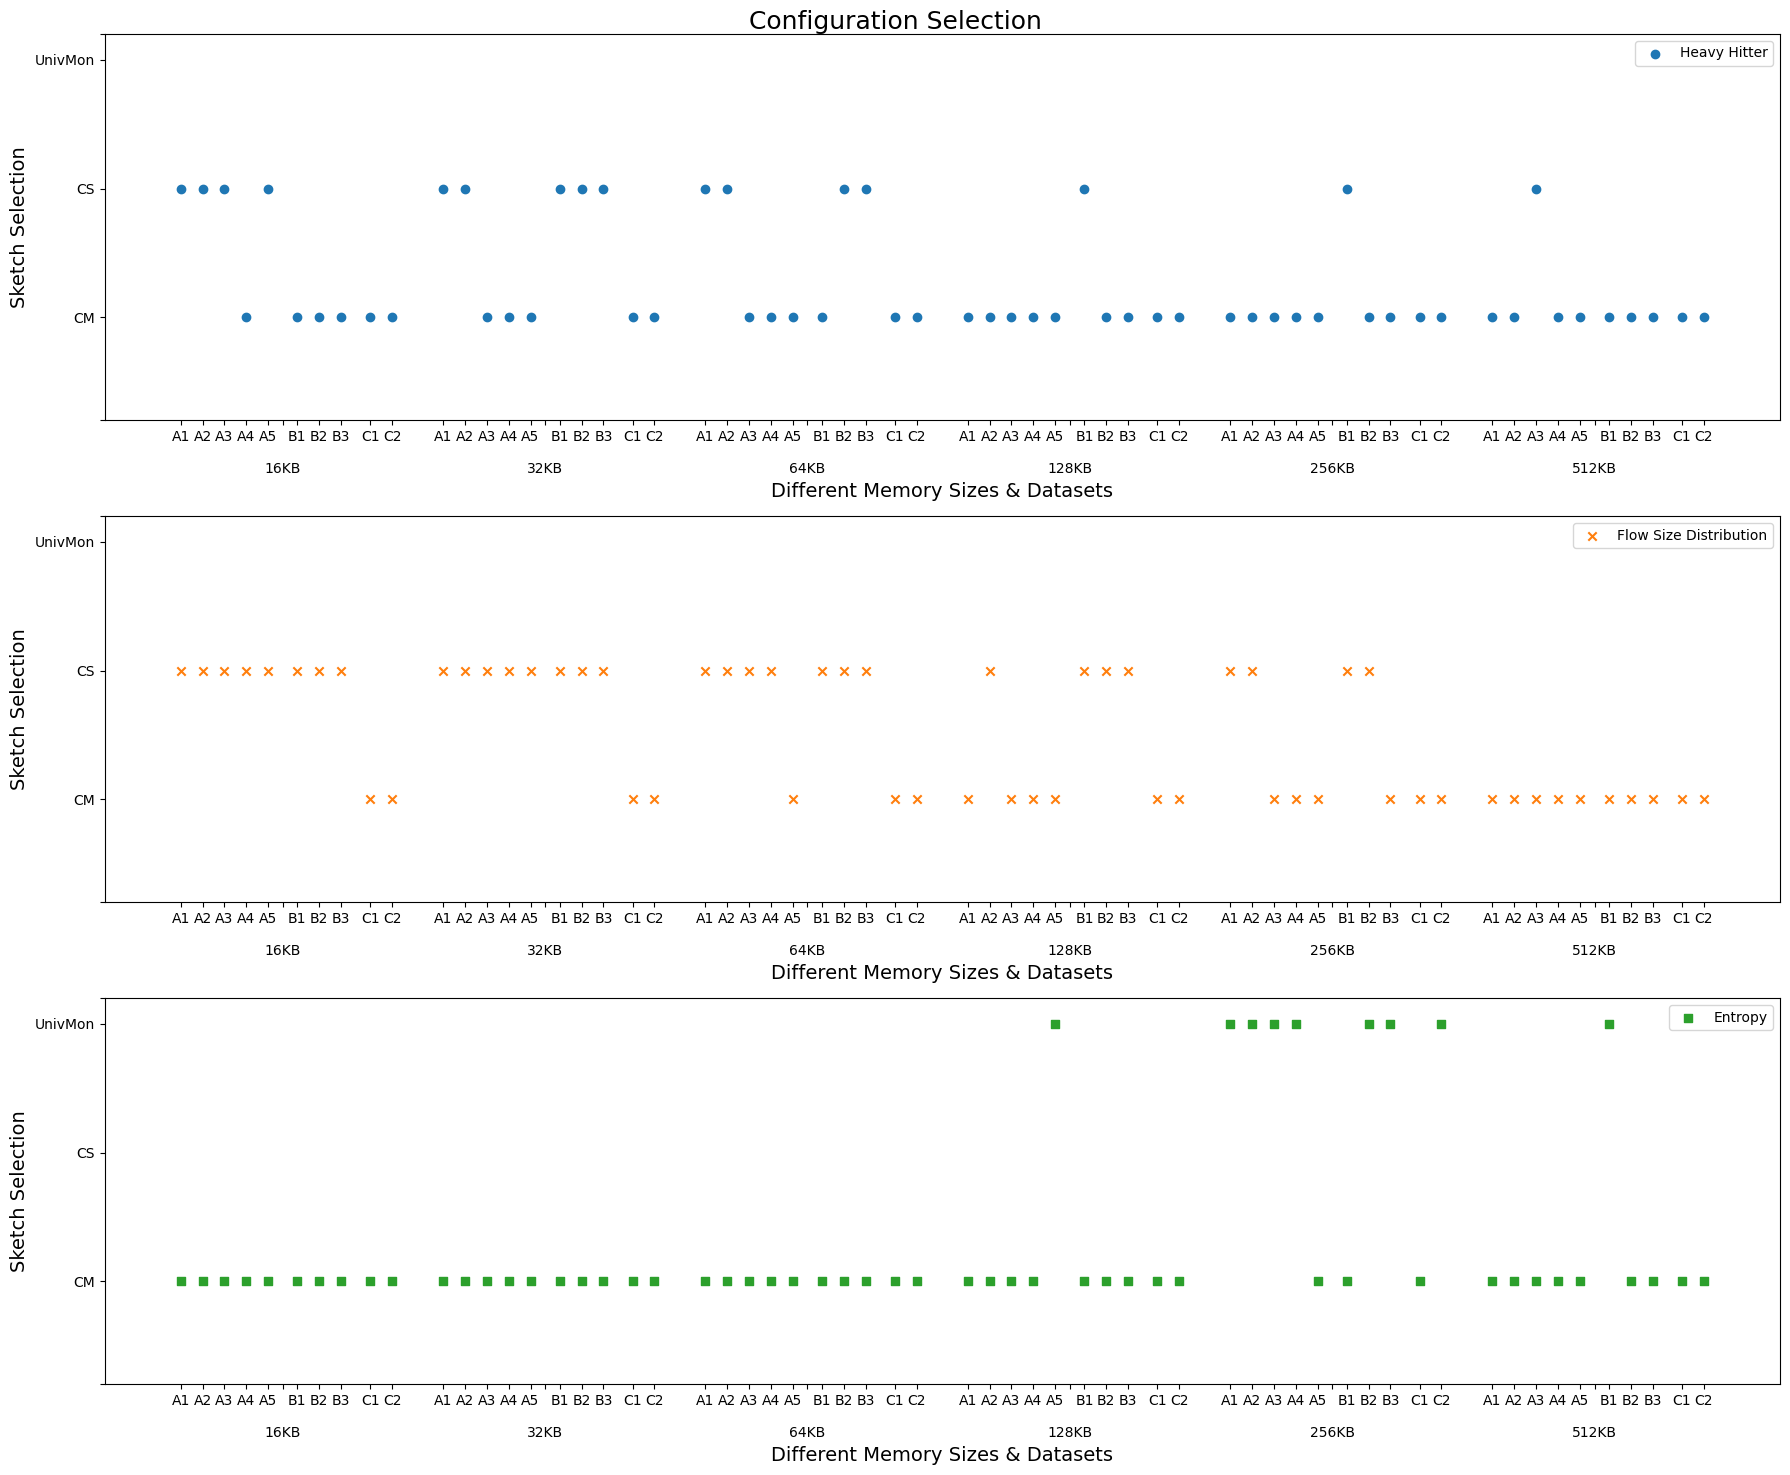

In [14]:
def plot_config_selection_metrics():
    x_ticks = ['16KB', '32KB', '64KB', '128KB', '256KB', '512KB']
    
    datasets = caida0517 + zipf2a + zipf10
    colors = ["tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:orange", "tab:orange", "tab:orange", "tab:green", "tab:green"]
    # datasets = [zipf10[0], caida0517[3], zipf2a[1], zipf10[1], caida0517[4], zipf2a[2]]
    none_bar = ["None" for i in range(len(datasets))]
    ## hh 
    hh_dict = {}
    for key in x_ticks:
        hh_dict[key] = []
        hh_res = prepare_hh_dict(key)
        for d in datasets:
            hh_dict[key].append(hh_res[d][-1])
            
    ## fsd 
    fsd_dict = {}
    for key in x_ticks:
        fsd_dict[key] = []
        fsd_res = prepare_fsd_dict(key)
        for d in datasets:
            fsd_dict[key].append(fsd_res[d][-1])
            
    ## ent 
    ent_dict = {}
    for key in x_ticks:
        ent_dict[key] = []
        ent_res = prepare_ent_dict(key)
        for d in datasets:
            ent_dict[key].append(ent_res[d][-1])
            
            
    hh_data = {key: hh_dict[key] for key in x_ticks}
    fsd_data = {key: fsd_dict[key] for key in x_ticks}
    ent_data = {key: ent_dict[key] for key in x_ticks}
            
    ## plot
    bar_heights = {'None': 0, 'cm': 1, 'cs': 2, 'univmon': 3}
    offset = [-15/36, -12/36, -9/36, -6/36, -3/36, 1/36, 4/36, 7/36, 11/36, 14/36]
    
    bar_width = 2/36
    bar_spacing = 1/36
    x = np.arange(len(x_ticks))
    
    # Additional ticks
    additional_ticks = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'C1', 'C2']
    all_ticks = []
    for i in range(len(x_ticks)):
        for j, val in enumerate(additional_ticks):
            if j == 5:
                all_ticks.append(f'\n\n{x_ticks[i]}')
                all_ticks.append(val)
            else:
                all_ticks.append(val)
    all_pos = []
    for p in x:
        for j in [-15/36, -12/36, -9/36, -6/36, -3/36, -1/36, 1/36, 4/36, 7/36, 11/36, 14/36]:
            all_pos.append(p+j)
    
    
    plt.figure(figsize=(18, 15))
    plt.subplot(3,1,1)
    plot = 0
    for i, (key, value) in enumerate(hh_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:blue', alpha=0.7, label=f'Heavy Hitter' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='o', color='tab:blue', label=f'Heavy Hitter' if plot == 0 else None)
                plot = 1
                
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Heavy Hitter", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)
    
    plt.subplot(3,1,2)
    plot = 0
    for i, (key, value) in enumerate(fsd_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:orange', alpha=0.7, label=f'Flow Size Distribution' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='x', color='tab:orange', label=f'Flow Size Distribution' if plot == 0 else None)
                plot = 1
                
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Flow Size Distribution", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)        
    
    plt.subplot(3,1,3)
    plot = 0
    for i, (key, value) in enumerate(ent_data.items()):
        for j, label in enumerate(value):
            bar_position = x[i] + offset[j]
            # plt.bar(bar_position, bar_heights[label], bar_width, color='tab:green', alpha=0.7, label=f'Entropy' if plot == 0 else None)
            # plot = 1
            if label != 'None':
                plt.scatter(bar_position, bar_heights[label], marker='s', color='tab:green', label=f'Entropy' if plot == 0 else None)
                plot = 1

    # plt.xticks(x, all_ticks)
    plt.legend()
    plt.xticks(all_pos, all_ticks)
    plt.yticks([0.2, 1, 2, 3, 3.2], ['', 'CM', 'CS', 'UnivMon', ''])
    # plt.title("Entropy", fontsize=20)
    plt.xlabel("Different Memory Sizes & Datasets", fontsize=14)
    plt.ylabel("Sketch Selection", fontsize=14)

    plt.suptitle("Configuration Selection", fontsize=18)
    plt.tight_layout()
    plt.show()
    
plot_config_selection_metrics()


### ARE Difference

---
#### Fixed FSD, Change TFS

In [89]:
def plot_are_with_diff_tfs_bar():
    x_ticks = ['16KB', '32KB', '64KB']
    mems = ['500w', '250w', '150w', '70w', '30w']
    colors = {'16KB': 'tab:blue', '32KB': 'tab:orange', '64KB': 'tab:green'}
    ## hh 
    hh_dict = {}
    key_list = []
    res = []
    for key in x_ticks:
        hh_dict[key] = {}
        hh_res = prepare_hh_dict(key)
        for pcap1 in caida0517:
            for pcap2 in caida0517:
                if pcap1 == pcap2:
                    hh_dict[key][0] = 0
                elif pcap1 != pcap2:
                    if hh_res[pcap1][3] != hh_res[pcap2][3]: # choose diff algo
                        if hh_res[pcap2][3] == "cm": # cs -> cm
                            hh_dict[key][int(pcap2[-4:-1]) - int(pcap1[-4:-1])] = abs(hh_res[pcap2][0] - hh_res[pcap2][1])
                        else: # cm -> cs
                            hh_dict[key][int(pcap2[-4:-1]) - int(pcap1[-4:-1])] = abs(hh_res[pcap2][1] - hh_res[pcap2][0])
                    else:
                        hh_dict[key][int(pcap2[-4:-1]) - int(pcap1[-4:-1])] = 0    
                            
        sorted_are_dict = dict(sorted(list(hh_dict[key].items())))
        re_are_list = list(sorted_are_dict.values())
        res.append(re_are_list)
        key_list = list(sorted_are_dict.keys())
        
        # bar graph
        plt.figure(figsize=(15, 5))
        # Position of bars on x-axis
        x = range(len(key_list))

        # Plotting 
        plt.bar(x, re_are_list, width=0.3, label=key, color=colors[key])
            
        # Adding labels and title
        plt.xlabel('TFS Difference')
        plt.ylabel('Delta ARE')
        plt.title('The Impact of TFS Changes on ARE (CAIDA0517)')
        plt.xticks(x, [f'{key}w' for key in key_list])  # Adjusting x-axis ticks to be in the middle
        plt.legend()
        plt.show()
        
    # # Plotting the bar graph
    # plt.figure(figsize=(15, 5))
    # # Position of bars on x-axis
    # x = range(len(key_list))
    # offset = [-0.3, 0, 0.3]

    # # Plotting 
    # for j, tick in enumerate(x_ticks): 
    #     plt.bar([i + offset[j] for i in x], res[j], width=0.3, label=tick, color=colors[tick])
        
    # # Adding labels and title
    # plt.xlabel('TFS Difference')
    # plt.ylabel('Delta ARE')
    # plt.title('The Impact of TFS Changes on ARE (CAIDA0517)')
    # plt.xticks(x, [f'{key}w' for key in key_list])  # Adjusting x-axis ticks to be in the middle
    # plt.legend()
    # plt.show()
        

In [93]:
def plot_hh_with_diff_tfs_heatmap():
    x_ticks = ['16KB', '32KB', '64KB']
    mems = ['500w', '250w', '150w', '70w', '30w']
    ## hh 
    hh_dict = {}
    for key in x_ticks:
        hh_dict[key] = {}
        ARE = []
        hh_res = prepare_hh_dict(key)
        for pcap1 in caida0517:
            single_ARE = []
            for pcap2 in caida0517[::-1]:
                if pcap1 == pcap2:
                    single_ARE.append(0)
                elif pcap1 != pcap2:
                    if hh_res[pcap1][3] != hh_res[pcap2][3]: # choose diff algo
                        if hh_res[pcap2][3] == "cm": # cs -> cm
                            single_ARE.append(abs(hh_res[pcap2][0] - hh_res[pcap2][1]))
                        else: # cm -> cs
                            single_ARE.append(abs(hh_res[pcap2][1] - hh_res[pcap2][0]))
                    else:
                        single_ARE.append(0)
            ARE.append(single_ARE)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(ARE, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(ARE)):
            for j in range(len(ARE[i])):
                plt.text(j, i, f'{ARE[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(mems)), mems[::-1], rotation=0)
        plt.yticks(np.arange(len(mems)), mems, rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of TFS Changes on ARE\n(CAIDA0517, HH, Mem = %s)' % (key))
        plt.colorbar(shrink=0.7)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   
        

In [100]:
def plot_fsd_with_diff_tfs_heatmap():
    x_ticks = ['64KB', '128KB', '256KB']
    mems = ['500w', '250w', '150w', '70w', '30w']
    ## fsd
    for key in x_ticks:
        WMRD = []
        fsd_res = prepare_fsd_dict(key)
        for pcap1 in caida0517:
            single_WMRD = []
            for pcap2 in caida0517[::-1]:
                if pcap1 == pcap2:
                    single_WMRD.append(0)
                elif pcap1 != pcap2:
                    if fsd_res[pcap1][2] != fsd_res[pcap2][2]: # choose diff algo
                        if fsd_res[pcap2][2] == "cm": # cs -> cm
                            single_WMRD.append(abs(fsd_res[pcap2][0] - fsd_res[pcap2][1]))
                        else: # cm -> cs
                            single_WMRD.append(abs(fsd_res[pcap2][1] - fsd_res[pcap2][0]))
                    else:
                        single_WMRD.append(0)
            WMRD.append(single_WMRD)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(WMRD, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(WMRD)):
            for j in range(len(WMRD[i])):
                plt.text(j, i, f'{WMRD[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(mems)), mems[::-1], rotation=0)
        plt.yticks(np.arange(len(mems)), mems, rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of TFS Changes on WMRD\n(CAIDA0517, FSD, Mem = %s)' % (key))
        plt.colorbar(shrink=0.7)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   
        

In [105]:
def plot_ent_with_diff_tfs_heatmap():
    x_ticks = ['128KB', '256KB']
    mems = ['500w', '250w', '150w', '70w', '30w']
    ## fsd
    for key in x_ticks:
        RE = []
        ent_res = prepare_ent_dict(key)
        for pcap1 in caida0517:
            single_RE = []
            for pcap2 in caida0517[::-1]:
                if pcap1 == pcap2:
                    single_RE.append(0)
                elif pcap1 != pcap2:
                    if ent_res[pcap1][3] != ent_res[pcap2][3]: # choose diff algo
                        if ent_res[pcap2][3] == "cm": # univ -> cm
                            single_RE.append(abs(ent_res[pcap2][0] - ent_res[pcap2][2]))
                        else: # cm -> univ
                            single_RE.append(abs(ent_res[pcap2][2] - ent_res[pcap2][0]))
                    else:
                        single_RE.append(0)
            RE.append(single_RE)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(RE, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(RE)):
            for j in range(len(RE[i])):
                plt.text(j, i, f'{RE[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(mems)), mems[::-1], rotation=0)
        plt.yticks(np.arange(len(mems)), mems, rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of TFS Changes on RE\n(CAIDA0517, ENT, Mem = %s)' % (key))
        plt.colorbar(shrink=0.7)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   
        

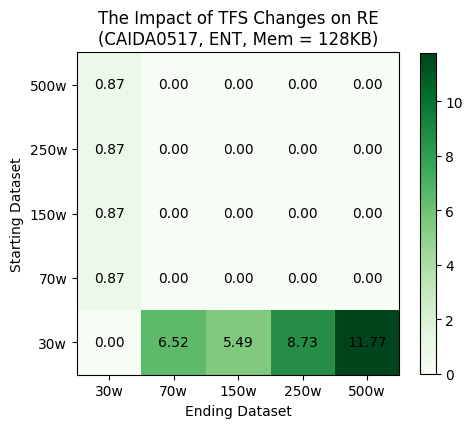

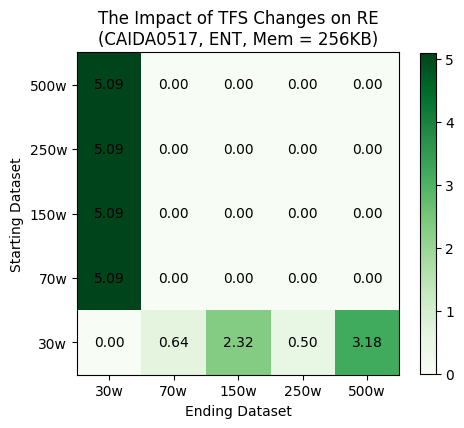

In [106]:
# plot_are_with_diff_tfs_bar()

# plot_hh_with_diff_tfs_heatmap()
# plot_fsd_with_diff_tfs_heatmap()
plot_ent_with_diff_tfs_heatmap()

---
#### Fixed TFS, Change FSD

In [122]:
def plot_are_with_diff_fsd_bar(dataset1 = [caida0517[3], zipf2a[1], zipf10[0]], tfs='70w'):
    x_ticks = ['32KB', '64KB']
    mems = ['70w', '30w']
    colors = {'16KB': 'tab:blue', '32KB': 'tab:orange', '64KB': 'tab:green'}
    ## hh 
    hh_dict = {}
    key_list = []
    res = []
    for key in x_ticks:
        hh_dict[key] = {}
        hh_res = prepare_hh_dict(key)
        for pcap1 in dataset1:
            for pcap2 in dataset1:
                if pcap1 == pcap2:
                    # hh_dict[key][0] = 0
                    continue
                elif pcap1 != pcap2:
                    if hh_res[pcap1][3] != hh_res[pcap2][3]: # choose diff algo
                        if hh_res[pcap2][3] == "cm": # cs -> cm
                            hh_dict[key][f'{pcap1.split("-")[0]}->{pcap2.split("-")[0]}'] = abs(hh_res[pcap2][0] - hh_res[pcap2][1])
                        else: # cm -> cs
                            hh_dict[key][f'{pcap1.split("-")[0]}->{pcap2.split("-")[0]}'] = abs(hh_res[pcap2][1] - hh_res[pcap2][0])
                    else:
                        hh_dict[key][f'{pcap1.split("-")[0]}->{pcap2.split("-")[0]}'] = 0    
                            
        sorted_are_dict = dict(sorted(list(hh_dict[key].items())))
        re_are_list = list(sorted_are_dict.values())
        res.append(re_are_list)
        key_list = list(sorted_are_dict.keys())
        
        # # bar graph
        # plt.figure(figsize=(12, 5))
        # # Position of bars on x-axis
        # x = range(len(key_list))

        # # Plotting 
        # plt.bar(x, re_are_list, width=0.3, label=key, color=colors[key])
            
        # # Adding labels and title
        # plt.xlabel('TFS Difference')
        # plt.ylabel('Delta ARE')
        # plt.title(f'The Impact of FSD Changes on ARE\n(TFS = {tfs})')
        # plt.xticks(x, key_list)  # Adjusting x-axis ticks to be in the middle
        # plt.legend()
        # plt.show()
        
    # Plotting the bar graph
    plt.figure(figsize=(12, 5))
    # Position of bars on x-axis
    x = range(len(key_list))
    offset = [-0.3, 0]

    # Plotting 
    for j, tick in enumerate(x_ticks): 
        plt.bar([i + offset[j] for i in x], res[j], width=0.3, label=tick, color=colors[tick])
        
    # Adding labels and title
    plt.xlabel('TFS Difference')
    plt.ylabel('Delta ARE')
    plt.title(f'The Impact of FSD Changes on ARE\n(TFS = {tfs})')
    plt.xticks(x, key_list)  # Adjusting x-axis ticks to be in the middle
    plt.legend()
    plt.show()
        

In [137]:
def plot_hh_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w'):
    mems = ['32KB', '64KB']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## hh 
    for key in mems:
        ARE = []
        hh_res = prepare_hh_dict(key)
        for pcap1 in dataset1:
            single_ARE = []
            for pcap2 in dataset1[::-1]:
                if pcap1 == pcap2:
                    single_ARE.append(0)
                elif pcap1 != pcap2:
                    if hh_res[pcap1][3] != hh_res[pcap2][3]: # choose diff algo
                        if hh_res[pcap2][3] == "cm": # cs -> cm
                            single_ARE.append(abs(hh_res[pcap2][0] - hh_res[pcap2][1]))
                        else: # cm -> cs
                            single_ARE.append(abs(hh_res[pcap2][1] - hh_res[pcap2][0]))
                    else:
                        single_ARE.append(0)
            ARE.append(single_ARE)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(ARE, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(ARE)):
            for j in range(len(ARE[i])):
                plt.text(j, i, f'{ARE[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(dataset1)), x_ticks, rotation=0)
        plt.yticks(np.arange(len(dataset1)), x_ticks[::-1], rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of FSD Changes on ARE\n(TFS = %s, HH, Mem = %s)' % (tfs, key))
        plt.colorbar(shrink=0.6)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   
        

In [139]:
def plot_fsd_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w'):
    mems = ['64KB', '128KB']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## fsd 
    for key in mems:
        WMRD = []
        fsd_res = prepare_fsd_dict(key)
        for pcap1 in dataset1:
            single_WMRD = []
            for pcap2 in dataset1[::-1]:
                if pcap1 == pcap2:
                    single_WMRD.append(0)
                elif pcap1 != pcap2:
                    if fsd_res[pcap1][2] != fsd_res[pcap2][2]: # choose diff algo
                        if fsd_res[pcap2][2] == "cm": # cs -> cm
                            single_WMRD.append(abs(fsd_res[pcap2][0] - fsd_res[pcap2][1]))
                        else: # cm -> cs
                            single_WMRD.append(abs(fsd_res[pcap2][1] - fsd_res[pcap2][0]))
                    else:
                        single_WMRD.append(0)
            WMRD.append(single_WMRD)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(WMRD, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(WMRD)):
            for j in range(len(WMRD[i])):
                plt.text(j, i, f'{WMRD[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(dataset1)), x_ticks, rotation=0)
        plt.yticks(np.arange(len(dataset1)), x_ticks[::-1], rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of FSD Changes on WMRD\n(TFS = %s, HH, Mem = %s)' % (tfs, key))
        plt.colorbar(shrink=0.6)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   
        

In [146]:
def plot_ent_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w'):
    mems = ['256KB']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## ent 
    for key in mems:
        RE = []
        ent_res = prepare_ent_dict(key)
        for pcap1 in dataset1:
            single_RE = []
            for pcap2 in dataset1[::-1]:
                if pcap1 == pcap2:
                    single_RE.append(0)
                elif pcap1 != pcap2:
                    if ent_res[pcap1][3] != ent_res[pcap2][3]: # choose diff algo
                        if ent_res[pcap2][3] == "cm": # univmon -> cm
                            single_RE.append(abs(ent_res[pcap2][0] - ent_res[pcap2][2]))
                        else: # cm -> univmon
                            single_RE.append(abs(ent_res[pcap2][2] - ent_res[pcap2][0]))
                    else:
                        single_RE.append(0)
            RE.append(single_RE)            
            
    
        # Plot heatmap
        color = 'Greens'
        
        plt.figure(figsize=(5, 5))
        plt.imshow(RE, cmap=color , interpolation='nearest')

        # Add annotations for each cell
        for i in range(len(RE)):
            for j in range(len(RE[i])):
                plt.text(j, i, f'{RE[i][j]:.2f}', ha='center', va='center', color='black')

        plt.xticks(np.arange(len(dataset1)), x_ticks, rotation=0)
        plt.yticks(np.arange(len(dataset1)), x_ticks[::-1], rotation=0)
        

        plt.xlabel('Ending Dataset')
        plt.ylabel('Starting Dataset')
        plt.title('The Impact of FSD Changes on RE\n(TFS = %s, HH, Mem = %s)' % (tfs, key))
        plt.colorbar(shrink=0.6)  # Add colorbar
        
        plt.tight_layout()
        plt.show()   

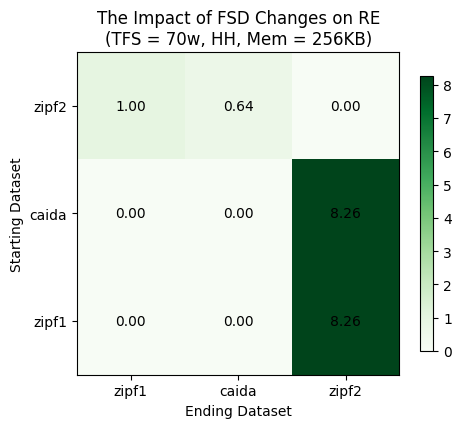

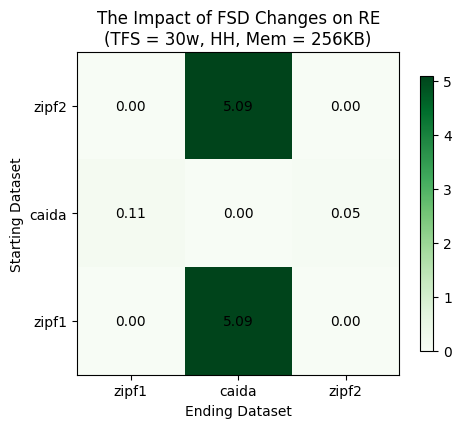

In [147]:
# plot_are_with_diff_fsd_bar(dataset1 = [caida0517[3], zipf2a[1], zipf10[0]], tfs='70w')
# plot_are_with_diff_fsd_bar(dataset1 = [caida0517[4], zipf2a[2], zipf10[1]], tfs='30w')

# plot_hh_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w')
# plot_hh_with_diff_fsd_heatmap(dataset1 = [zipf10[1], caida0517[4], zipf2a[2]], tfs='30w')

# plot_fsd_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w')
# plot_fsd_with_diff_fsd_heatmap(dataset1 = [zipf10[1], caida0517[4], zipf2a[2]], tfs='30w')

plot_ent_with_diff_fsd_heatmap(dataset1 = [zipf10[0], caida0517[3], zipf2a[1]], tfs='70w')
plot_ent_with_diff_fsd_heatmap(dataset1 = [zipf10[1], caida0517[4], zipf2a[2]], tfs='30w')